<a href="https://colab.research.google.com/github/chettkulkarni/advanced_deep_learning/blob/master/Assignment1/Assignment_1_%20Part_2/Assignment1_SemiSupervisedLearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SemiSupervised Learning

As the name suggest when we do machne learning with some supersion, but there is some data that is missing, and machine needs to learn the missing part on its own.

That is part Supervised and Part Unsupervised

## Why SemiSupervised Learning?

In real life examples we might not have concrete information about everything , hence having a mechanism which leverages known information and uses that information to build on that is very crucial


Problem:
Find out if the Loan can be given to the user or not


Data Source:- UCI Machine Learning Repo

More Information about Data Source

Source Credits:

Professor Dr. Hans Hofmann

Institut f"ur Statistik und "Okonometrie


Universit"at Hamburg


FB Wirtschaftswissenschaften


Von-Melle-Park 5
2000 Hamburg 13


About Data: The Data has 1000 rows and 25 columns, about credit approval process

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Data

In [2]:
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric',delim_whitespace=True,header=None)
columns = [
'checking_account',
'duration',
'credit_history',
'credit_amount',
'saving_account',
'present_emp_since',
'personal_status',
'residence_since',
'property',
'age',
'inst_plans',
'num_credits',
'dependents',
'telephone',
'foreign_worker',
'new_car',
'used_car',
'Debtors_None',
'Debtors_CoApplicant',
'Rent_hose',
'Own_Hose',
'Unemployed_And_Unskilled_Non_res',
'Unskilled_resident',
'skilled_official',
'status'
]
df.columns=columns

In [3]:
df.columns

Index(['checking_account', 'duration', 'credit_history', 'credit_amount',
       'saving_account', 'present_emp_since', 'personal_status',
       'residence_since', 'property', 'age', 'inst_plans', 'num_credits',
       'dependents', 'telephone', 'foreign_worker', 'new_car', 'used_car',
       'Debtors_None', 'Debtors_CoApplicant', 'Rent_hose', 'Own_Hose',
       'Unemployed_And_Unskilled_Non_res', 'Unskilled_resident',
       'skilled_official', 'status'],
      dtype='object')

# Preparing Data For Semi Supervised Learning

The data available is completely labelled
So, to demonstrtae we will create a subset of data to not have any label

like that we will have 3 subsets:
label_x,labely : Labeled Dataset
unlabel_x,unlabel_y : Unlabeled Dataset
and test dataset

In [4]:
df = shuffle(df, random_state=1)

In [5]:
X = df.drop(df.columns.difference(['checking_account', 'duration', 'credit_history', 'credit_amount',
       'saving_account', 'present_emp_since', 'personal_status',
       'residence_since', 'property', 'age', 'inst_plans', 'num_credits',
       'dependents', 'telephone', 'foreign_worker', 'new_car', 'used_car',
       'Debtors_None', 'Debtors_CoApplicant', 'Rent_hose', 'Own_Hose',
       'Unemployed_And_Unskilled_Non_res', 'Unskilled_resident',
       'skilled_official', 'status']), 1)
y = df.drop(df.columns.difference(['status']), 1)

In [6]:
X.shape,y.shape

((1000, 25), (1000, 1))

In [7]:
y

,status
507,2
818,1
452,1
368,2
242,2
...,...
767,1
72,1
908,1
235,2


In [8]:
import seaborn as sns

## Visualising and trying to find relations between columns

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


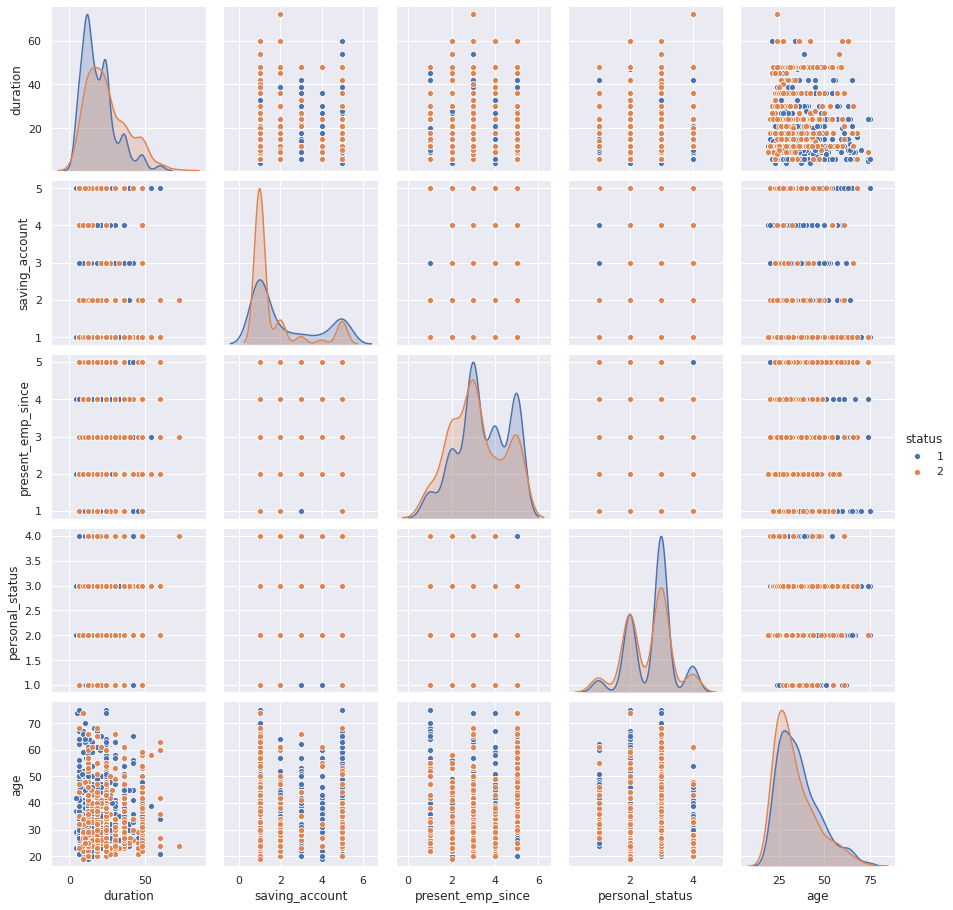

In [9]:
sns.set()
cols = [ 'duration','saving_account', 'present_emp_since', 'personal_status', 'age', 'status']
sns.pairplot(df[cols], size = 2.5,hue='status')
plt.show();

In [10]:
label_x, unlabel_x, test_x = np.split(X, [int(.1*len(X)), int(.5*len(X))])
label_y, unlabel_y, test_y = np.split(y, [int(.1*len(y)), int(.5*len(y))])
unlabel_y['status']=unlabel_y['status'].apply(lambda x:-1)
total_label_y = np.concatenate((label_y, unlabel_y))
total_label_x = np.concatenate((label_x, unlabel_x))

To be able to compare creating dataframe called results

In [11]:
index = ["Algorithm", "ROC AUC"]
results = pd.DataFrame(columns=index)

In [12]:
results

,Algorithm,ROC AUC


# Simple Logistic Regression on Labeled Datset

In [14]:
logr = LogisticRegression(random_state=1, class_weight='balanced')
logr.fit(label_x, label_y)
results = results.append(pd.Series(['Logistic Regression', roc_auc_score(test_y, logr.predict_proba(test_x)[:, 1])], index=index), ignore_index=True)
results

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Algorithm,ROC AUC
0,Logistic Regression,0.998751


Logistic Regreoy good with labelled dataset, now with unlabelled dataset, it wnt be able to perform because its a supervised learning technique.



So we will se label_prop

In [15]:
def label_prop(kernel, params, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(20,10))
    n, g = 0,0
    roc_scores=[]
    if kernel == 'rbf':
        for g in params:
            lp=LabelPropagation(kernel=kernel, n_neighbors=n, gamma=g, max_iter=10000, tol=0.0001)
            lp.fit(X_train, y_train)
            roc_scores.append(roc_auc_score(y_test, lp.predict_proba(X_test)[:, 1]))
    if kernel == 'knn':
        for n in params:
            lp = LabelPropagation(kernel=kernel, n_neighbors=n, gamma=g, max_iter=10000, tol=0.0001)
            lp.fit(X_train, y_train)
            roc_scores.append(roc_auc_score(y_test, lp.predict_proba(X_test)[:, 1]))
    plt.figure(figsize=(16,8))
    plt.plot(params, roc_scores)
    plt.title("ROC with " + kernel + "kernel")
    plt.show()
    print("")

# Radial Bias 
An RBF is a function that changes with distance from a location. For example, suppose the radial basis function is simply the distance from each location, so it forms an inverted cone over each location. If you take a cross section of the x,z plane for y = 5, you will see a slice of each radial basis function.

[Reference](https://pro.arcgis.com/en/pro-app/help/analysis/geostatistical-analyst/how-radial-basis-functions-work.htm)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

<Figure size 1440x720 with 0 Axes>

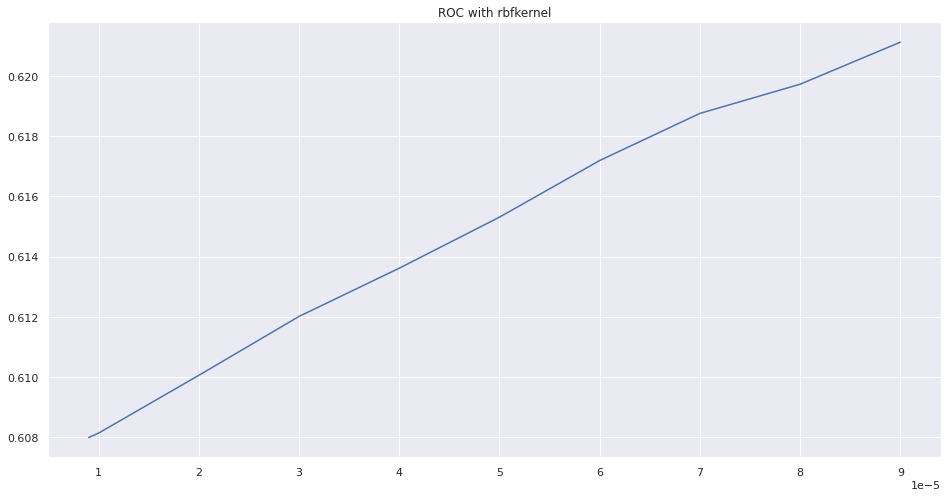

In [16]:
gamma=[9e-6, 1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5]
label_prop('rbf', gamma, total_label_x, test_x, total_label_y, test_y)

In [17]:
results = results.append(pd.Series(['Label Propagation RBF', "0.622"], index=index), ignore_index=True)

# KNN Kernel

Kth Nearest Neighbour technique to approximate the label is used

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

<Figure size 1440x720 with 0 Axes>

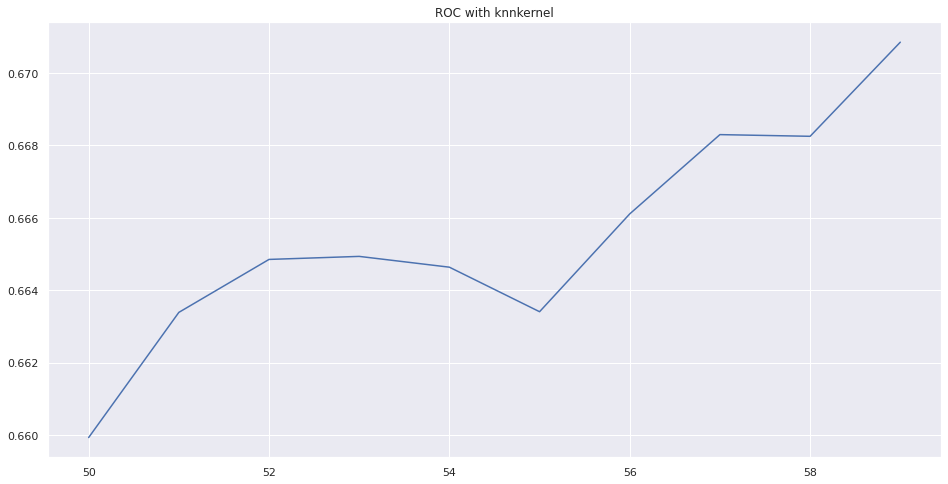

In [18]:
label_prop('knn', list(range(50,60)), total_label_x, test_x, total_label_y, test_y)
results = results.append(pd.Series(['Label Propagation KNN', "0.68"], index=index), ignore_index=True)

# Label Spread test


In [19]:
def labels_spread_test(kernel, hyperparam, alphas, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(20,10))
    n, g = 0, 0
    roc_scores = []
    if kernel == 'rbf':
        g = hyperparam
    if kernel == 'knn':
        n = hyperparam
    for alpha in alphas:
        ls = LabelSpreading(kernel=kernel, n_neighbors=n, gamma=g, alpha=alpha, max_iter=1000, tol=0.001)
        ls.fit(X_train, y_train)
        roc_scores.append(roc_auc_score(y_test, ls.predict_proba(X_test)[:,1]))
    plt.figure(figsize=(16,8))
    plt.plot(alphas, roc_scores)
    plt.title('Label Spreading ROC AUC with ' + kernel + ' kernel')
    plt.show()
    print('Best metrics value is at {}'.format(alphas[np.argmax(roc_scores)]))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

<Figure size 1440x720 with 0 Axes>

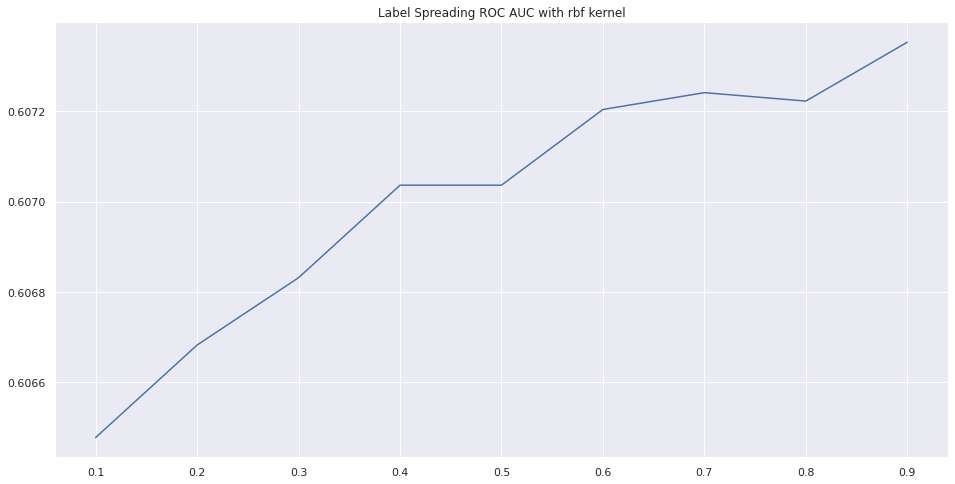

Best metrics value is at 0.9


In [20]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  
labels_spread_test('rbf', 1e-5, alphas, total_label_x, test_x, total_label_y, test_y)

In [21]:
results = results.append(pd.Series(['Label Spreading RBF', "0.6"], index=index), ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

<Figure size 1440x720 with 0 Axes>

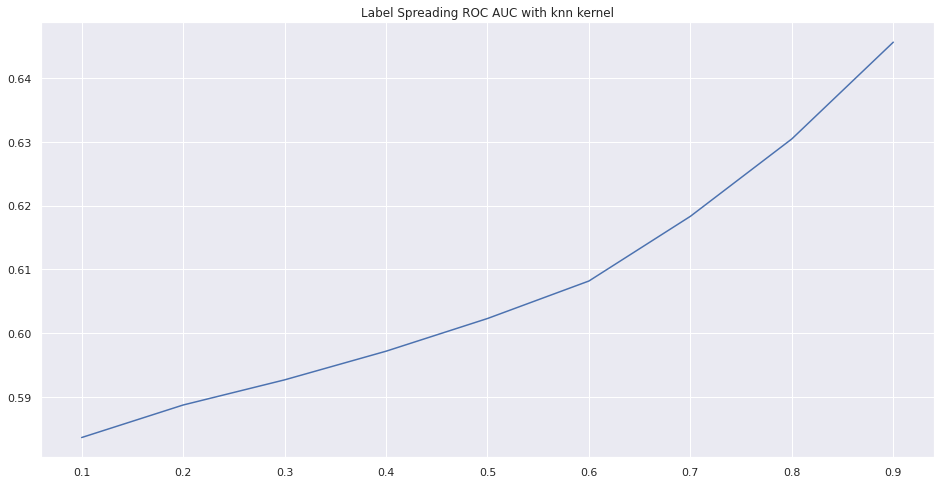

Best metrics value is at 0.9


In [22]:

labels_spread_test('knn',7, alphas, total_label_x, test_x, total_label_y, test_y)
results = results.append(pd.Series(['Label Spreading KNN', "0.65"], index=index), ignore_index=True)

In [23]:
results

,Algorithm,ROC AUC
0,Logistic Regression,0.998751
1,Label Propagation RBF,0.622
2,Label Propagation KNN,0.68
3,Label Spreading RBF,0.6
4,Label Spreading KNN,0.65


# Conclusion

So as demontrated semi supervised can help learn from part label, part unlabelled data. 
Label propgation and label Spreading are 2 techniques which can be used during this process.
